# Analyse de l'influence des distributions des temps inter-véhiculaires sur un axe routier

Paramètres de simulation:
- 1 voie
- longueur de la voie : 15900 m
- présence d'outils de contrôle de la circulation : non
- paramètres de distribution 
    <br/> dn -> N(8.33, 1) [m]
    <br/> longueur -> N(7, 1) [m]
    <br/> vitesse -> N(14, 3) [m.s^-1]
    <br/> t -> N(2, 0.5) [s]
- durée de la simulation : 500 s = 5000 1/10s   
- seed pour reproductibilité : 45

import des librairies:

In [1]:
import sys
sys.path.append('/Users/lionel/Documents/Cours Polytechnique Montréal/Maitrise/github/projetmaitrise/modules') 
import numpy as np  
import network, simulation 
import makesimulation 
import matplotlib.pyplot as plt
import analysis
import statistics

OpenCV library could not be loaded (video replay functions will not be available)


Récupération des fichiers initiaux

In [15]:
world = network.World.load('inputData/simple-net.yml')  
sim = simulation.Simulation.load('inputData/config.yml')

tracé des trajectoires selon les différentes valeurs des distribution pour les headway

- headways -> Exp(2.1, 1)
</br> On décalle la distribution à 1s % les temps inter-véhiculaires produits ne seront pas inférieurs à cette valeur

In [16]:
# modification des paramètres dans simple-net.yml
world.userInputs[0].distributions['headway'].scale, world.userInputs[0].distributions['headway'].loc = 1, 1.

# running the simulation
world = makesimulation.run(world, sim)

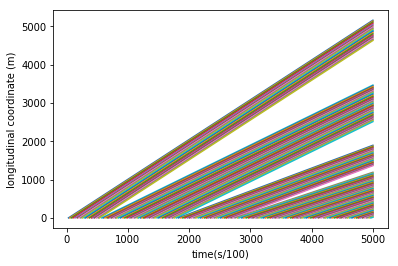

In [28]:
# tracé
plt.figure()
for ui in world.userInputs:
    for v in ui.alignment.vehicles:
        if v.timeInterval is not None:
            v.plotCurvilinearPositions()
    plt.xlabel('time(s/100)')
    plt.ylabel('longitudinal coordinate (m)')
    plt.show()

<br/> Nombre de véhicules simulés/Nombre de véhicules générés : 

In [29]:
print(str(len(world.getNotNoneVehiclesInWorld()[0])) + '/'+ str(len(world.users)))

150/327


Distribution des headways observés

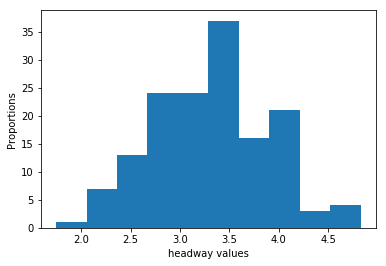

3.316915227907965


In [30]:
h = analysis.getHeadwayValues(world)
analysis.hist(h, 'headway values', 'Proportions')
print(statistics.mean(h))

Distribution des min des distances inter-véhiculaires, pour une coexistence d'une durée minimale de 2 min = 1200 1/10s

In [20]:
d = analysis.getMinDistanceBetweenEachPairCF(world, 1200)

(array([0.0153778, 0.0230667, 0.       , 0.0538223, 0.0615112, 0.0615112,
        0.0922668, 0.0845779, 0.0922668, 0.0999557, 0.0538223, 0.0307556,
        0.0538223, 0.0307556, 0.0384445, 0.0153778, 0.0307556, 0.0076889,
        0.0076889, 0.0153778, 0.0076889, 0.0153778]),
 array([12.51415808, 13.63534447, 14.75653086, 15.87771725, 16.99890364,
        18.12009002, 19.24127641, 20.3624628 , 21.48364919, 22.60483558,
        23.72602196, 24.84720835, 25.96839474, 27.08958113, 28.21076752,
        29.33195391, 30.45314029, 31.57432668, 32.69551307, 33.81669946,
        34.93788585, 36.05907224, 37.18025862]),
 <a list of 22 Patch objects>)

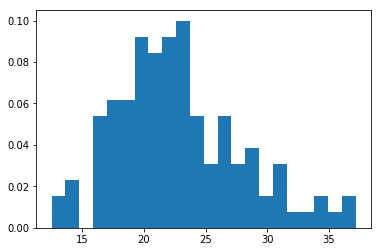

In [21]:
plt.hist(d, bins=22, density=True)# 'min distance between users', 'proportions')

Nombre d'interactions et leur durée observées à une distance < 25 m

In [22]:
interDuration = world.getInteractionsDuration(dmin=25, inLine=True)

In [23]:
c = 0 # nombre d'interaction
s = 0 # duree moyenne des interactions
interactionLength = []
for pair in interDuration:
    if interDuration[pair][0] !=0:
        c += interDuration[pair][0]
        s += sum(interDuration[pair][1:])
        interactionLength.append(interDuration[pair][1:])
print(c, s)

115 248925


Durée moyenne des interactions

In [24]:
if c != 0:
    print(s/c)

2164.5652173913045


distribution de la durée des interactions (ayant lieu a une distance < 25 m)
</br>**a voir**

([array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.        , 0.        , 0.00061075]),
  array([0.  

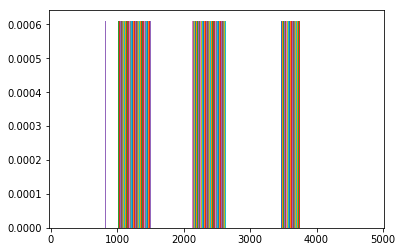

In [25]:
plt.hist(interactionLength, bins=3, density=True)

Tracé des courbes de TTC

minTTCValues = analysis.getTTCValuesForEachPairOfVehicles(world, sim, plot=True)[1]

Distribution des TTC min

plt.hist(minTTCValues, bins=30, density=True)
minTTCValues

- headways -> Exp(1, 1)

In [ ]:
# modification des paramètres dans simple-net.yml
world = network.World.load('inputData/simple-net.yml')  
world.userInputs[0].distributions['headway'].scale, world.userInputs[0].distributions['headway'].loc = 1, 1
world = makesimulation.run(world, sim)

In [ ]:
#tracé
plt.figure()
for ui in world.userInputs:
    for v in ui.alignment.vehicles:
        if v.timeInterval is not None:
            v.plotCurvilinearPositions()
    plt.xlabel('time(s/100)')
    plt.ylabel('longitudinal coordinate (m)')
    plt.show()

<br/> Nombre de véhicules simulés/Nombre de véhicules générés : 

In [ ]:
print(str(len(world.getNotNoneVehiclesInWorld()[0])) + '/'+ str(len(world.users)))

Distribution des headways observés

In [ ]:
h = analysis.getHeadwayValues(world)
analysis.hist(h, 'headway values', 'Proportions')
print(statistics.mean(h))

Distribution des min des distances inter-véhiculaires 

In [ ]:
d = analysis.getMinDistanceBetweenEachPairCF(world, 1200)

In [ ]:
plt.hist(d, bins=22, density=True)# 'min distance between users', 'proportions')

Nombre d'interactions en lignes observées à une distance < 25m

In [ ]:
interDuration = world.getInteractionsDuration(dmin=25, inLine=True)

In [ ]:
c = 0 # nombre d'interaction
s = 0 # duree moyenne des interactions
interactionLength = []
for pair in interDuration:
    if interDuration[pair][0] !=0:
        c += interDuration[pair][0]
        s += sum(interDuration[pair][1:])
        interactionLength.append(interDuration[pair][1:])
print(c, s)

Durée moyenne des interactions

In [ ]:
if c != 0:
    print(s/c)

distribution de la durée des interactions (ayant lieu a une distance < 25 m)
</br>**a voir**

In [ ]:
plt.hist(interactionLength, bins=3, density=True)

Tracé des courbes de TTC

In [ ]:
minTTCValues = analysis.getTTCValuesForEachPairOfVehicles(world, sim, plot=True)[1]

Distribution des TTC min

In [ ]:
plt.hist(minTTCValues, bins=30, density=True)
minTTCValues

- headways -> Exp(1.8, 1.)

In [ ]:
# modification des paramètres dans simple-net.yml
world = network.World.load('inputData/simple-net.yml')  
world.userInputs[0].distributions['headway'].scale, world.userInputs[0].distributions['headway'].loc = 1.8, 1.
world = makesimulation.run(world, sim)

In [ ]:
# tracé
plt.figure()
for ui in world.userInputs:
    for v in ui.alignment.vehicles:
        if v.timeInterval is not None:
            v.plotCurvilinearPositions()
    plt.xlabel('time(s/100)')
    plt.ylabel('longitudinal coordinate (m)')
    plt.show()

<br/> Nombre de véhicules simulés/Nombre de véhicules générés : 

In [ ]:
print(str(len(world.getNotNoneVehiclesInWorld()[0])) + '/'+ str(len(world.users)))

Distribution des headways observés

In [ ]:
h = analysis.getHeadwayValues(world)
analysis.hist(h, 'headway values', 'Proportions')
print(statistics.mean(h))

Distribution des min des distances inter-véhiculaires, pour une coexistence d'une durée minimale de 2 min = 1200 1/10s

In [ ]:
d = analysis.getMinDistanceBetweenEachPairCF(world, 1200)

In [ ]:
plt.hist(d, bins=15, density=True)# 'min distance between users', 'proportions')

Nombre d'interactions et leur durée observées à une distance < 25 m

In [ ]:
interDuration = world.getInteractionsDuration(dmin=25, inLine=True)

In [ ]:
c = 0 # nombre d'interaction
s = 0 # duree moyenne des interactions
interactionLength = []
for pair in interDuration:
    if interDuration[pair][0] !=0:
        c += interDuration[pair][0]
        s += sum(interDuration[pair][1:])
        interactionLength.append(interDuration[pair][1:])
print(c, s)

Durée moyenne des interactions

In [ ]:
if c != 0:
    print(s/c)

distribution de la durée des interactions (ayant lieu a une distance < 25 m)
</br>**a voir**

In [ ]:
plt.hist(interactionLength, bins=3, density=True)

Tracé des courbes de TTC

In [ ]:
minTTCValues = analysis.getTTCValuesForEachPairOfVehicles(world, sim, plot=True)[1]

Distribution des TTC min

In [ ]:
plt.hist(minTTCValues, bins=30, density=True)
minTTCValues